# <font color='blue'>Gradient Descent Assignment</font>
The aim of this assignment is to understand the Gradient descent optimization process in more detail. In the previous section on Gradient Descent, we discussed how to implement gradient calculation and weight update for a single variable ( `m` ) using simple math operations. In this assignment are required to do the same, but for 2 variables. We will use the full form of a line i.e. `y = mx + c`. You need to estimate the values of the two variables `m` and `c` using Stochastic Gradient Descent.

You have two tasks:
1. `Implement the gradient calculation step for the 2 variables.`
2. `Implement the weight update step for the 2 variables.`

## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Implement Gradients </h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Implement SGD</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

torch.manual_seed(0)

In [2]:
plt.rcParams["figure.figsize"] = (15, 8)

## <font style="color:blue">Generate Data </font>
We will generate 1000 data points for the experiment. The x axis is the independent variable which has values randomly distributed between -5 to 5. We assume some values for m and c to create the data points for the dependent variable ( y-axis ). We also add some randomness so that the y values are different for the same x. 

Now, we have a simple dataset which has been generated using a linear model in the presence of noise. The data has been dispayed using the scatter plot.

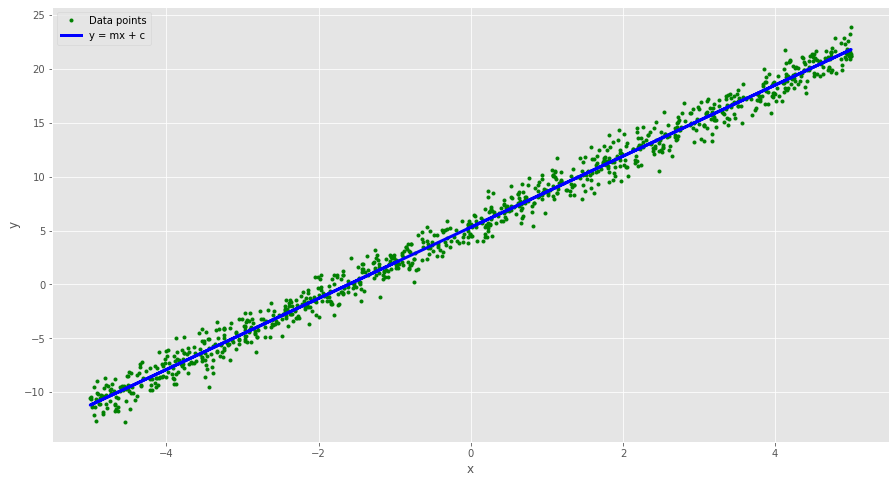

In [3]:
# Generating y = mx + c + random noise
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3

# input (Generate random data between [-5,5])
x = 10 * torch.rand(num_data) - 5

# Output (Generate data assuming y = mx + c + noise)
y_label = m_line * x + c_line + torch.randn_like(x)
y = m_line * x + c_line

# Plot the generated data points 
plt.plot(x, y_label, '.', color='g', label="Data points")
plt.plot(x, y, color='b', label='y = mx + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. The equation for such a line is 

$$
y = mx + c
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e., 

$$
y_i = m x_i + c
$$

Unless we have perfect data with no noise, even the best $m$ and $c$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i -c) 
$$

We want to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in mimimizing the square of the error above. In addition, we want to mimimize the squared error over all the data points.

In other words, we want to mimize a function of the residual that takes the following form

$$
l_{sse} = \sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

This function is called the **loss function**. The sum of squared errors is just one type of loss function. Another extension of this can be the `mean squared error` function which is given by
$$
l_{mse} = \frac{1}{N}\sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

It is simply the mean of squared error discussed above.

There are other types of loss functions which will learn about later in the course. 

## <font style="color:blue">Gradient Descent (30 Points)</font>

We have already seen how the math works for `m`. The same approach applies to the case for `m` and `c`. 

We calculate the loss function and then take partial derivatives w.r.t `m` and `c` respectively.
$$
\begin{align}
l &= \sum^n_{i=1}(y_i - m x_i - c)^2 \\
\frac{\partial l}{\partial m}  &= -2 \sum^n_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l}{\partial c}  &= -2 \sum^n_{i=1} (y_i - m x_i - c) \\
\end{align}
$$


To follow the slope of the curve, we need to move m in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the `learning rate`. 

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l}{\partial c} \\ 
\end{align}
$$

That is it! 

Let's implement this in code to see that it really works. 



<div class="alert alert-block alert-info">
    <b>1. Implement Gradients: 20 Points</b>
</div>

In [4]:
def gradient_wrt_m_and_c(inputs, labels, m, c, k):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    k (torch.tensor, dtype=int): random index of data points
    '''
    # gradient w.r.t to m is g_m 
    # gradient w.r.t to c is g_c
    ###
    ### YOUR CODE HERE
    g_m = -2 * torch.sum(inputs[k] * (labels[k] - m * inputs[k] -c))
    g_c = -2 * torch.sum(labels[k] - m * inputs[k] -c)
    ###
    
    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
k = torch.tensor([0, 2])
```
Output:
```
Gradient of m : -24.93
Gradient of c : 1.60
```

In [5]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
k = torch.tensor([0, 2])

gm, gc = gradient_wrt_m_and_c(X, Y, m, c, k)

print('Gradient of m : {0:.2f}'.format(gm))
print('Gradient of c : {0:.2f}'.format(gc))    

Gradient of m : -24.93
Gradient of c : 1.60


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div class="alert alert-block alert-info">
    <b>2. Implement SGD: 10 Points</b>
</div>

In [8]:
def update_m_and_c(m, c, g_m, g_c, lr):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    '''
    # update m and c parameters
    # store updated value of m is updated_m variable
    # store updated value of c is updated_c variable
    ###
    ### YOUR CODE HERE
    updated_m = m - lr * g_m
    updated_c = c - lr * g_c
    ###
    return updated_m, updated_c

**Test your code before submitting it using the below code cell.**

For given input:
```
m = 2
c = 3
g_m = -24.93
g_c = 1.60
lr = 0.001
```
Output:
```
Updated m: 2.02
Updated c: 3.00
```

In [9]:
m = 2
c = 3
g_m = -24.93
g_c = 1.60
lr = 0.001
m, c = update_m_and_c(m, c, g_m, g_c, lr)

print('Updated m: {0:.2f}'.format(m))
print('Updated c: {0:.2f}'.format(c))

Updated m: 2.02
Updated c: 3.00


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:blue">Training</font>


Iteration: 0, Loss: 0.0, updated m: 2.040, updated c: 1.071


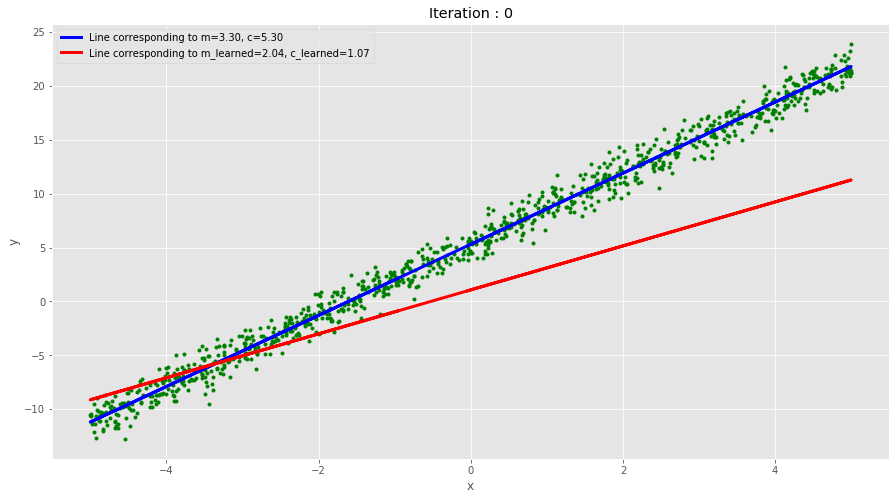

Iteration: 20, Loss: 0.0, updated m: 3.263, updated c: 2.415


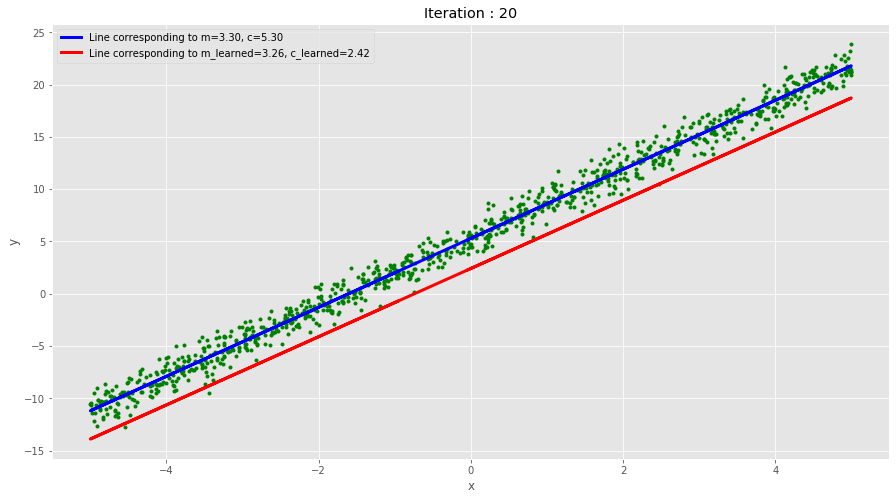

Iteration: 40, Loss: 0.0, updated m: 3.318, updated c: 3.403


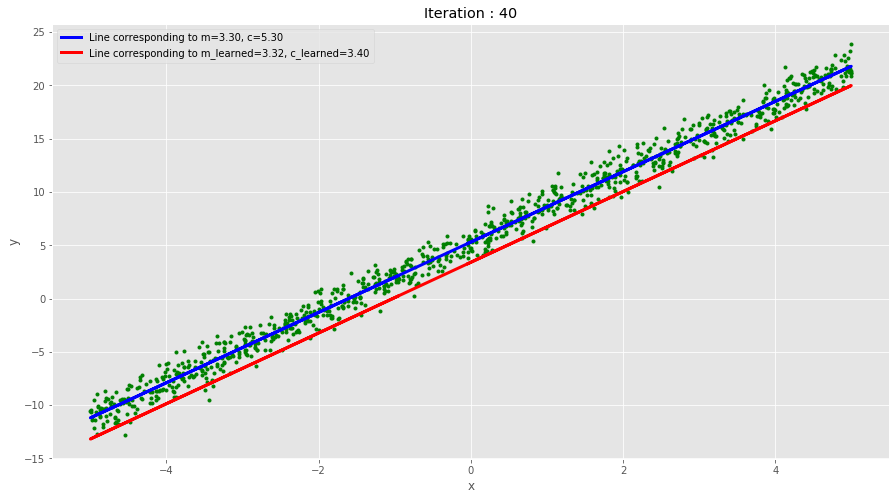

Iteration: 60, Loss: 0.0, updated m: 3.325, updated c: 4.041


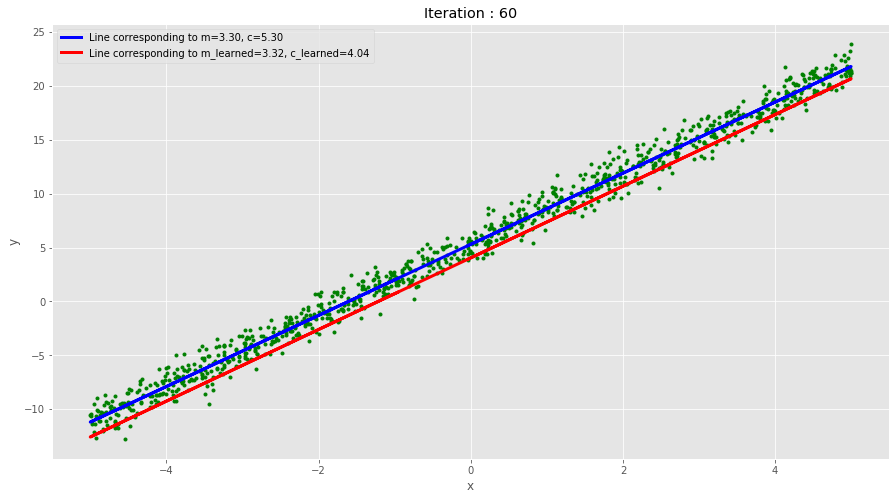

Iteration: 80, Loss: 0.0, updated m: 3.298, updated c: 4.486


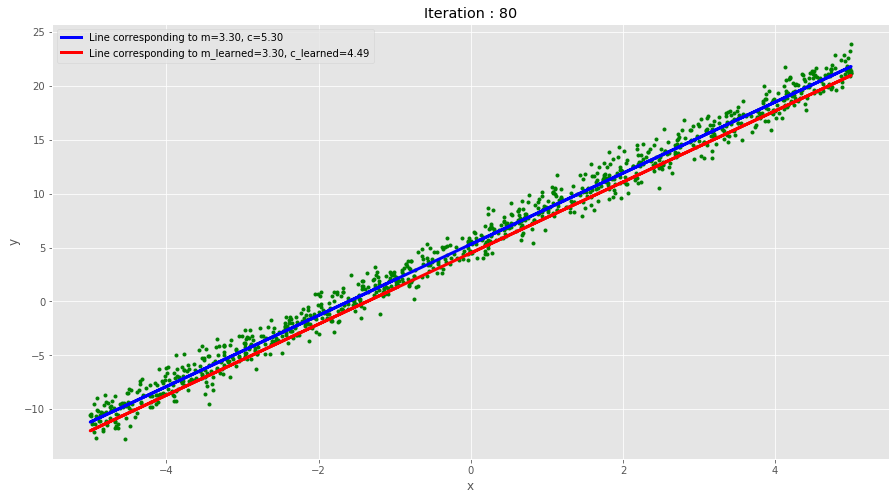

Iteration: 100, Loss: 0.0, updated m: 3.292, updated c: 4.755


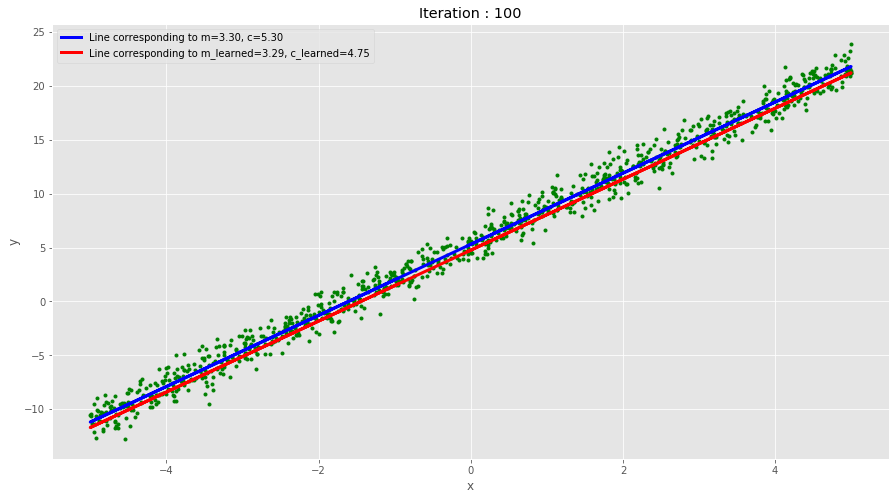

Iteration: 120, Loss: 0.0, updated m: 3.270, updated c: 4.955


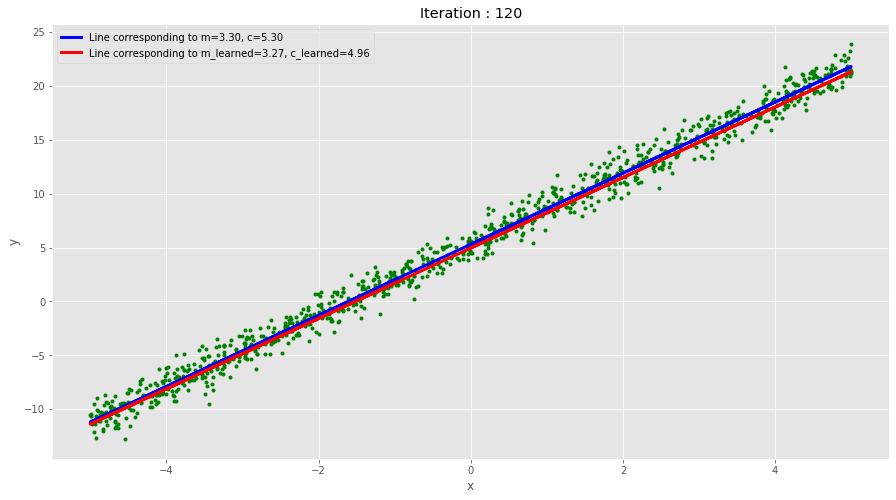

Iteration: 140, Loss: 0.0, updated m: 3.301, updated c: 5.067


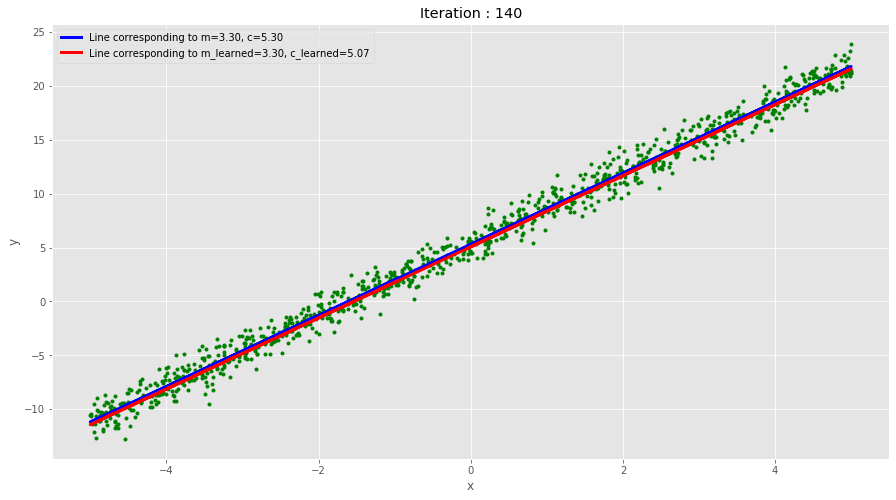

Iteration: 160, Loss: 0.0, updated m: 3.318, updated c: 5.154


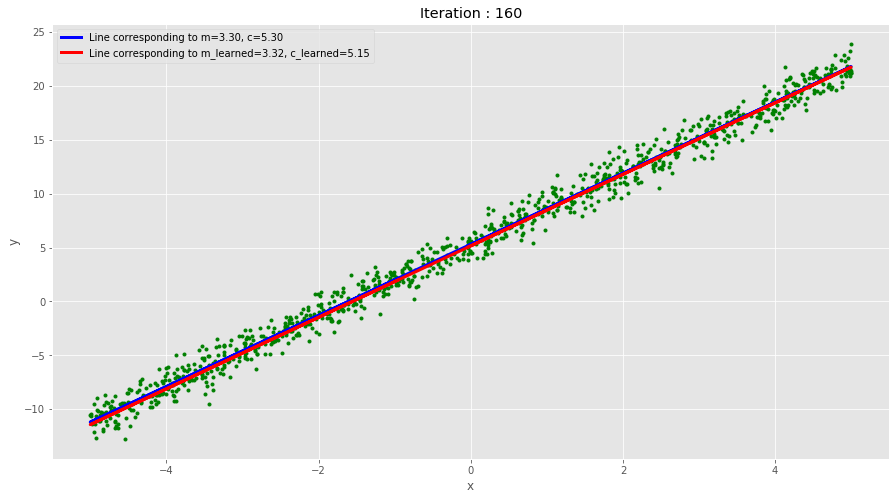

Iteration: 180, Loss: 0.0, updated m: 3.276, updated c: 5.195


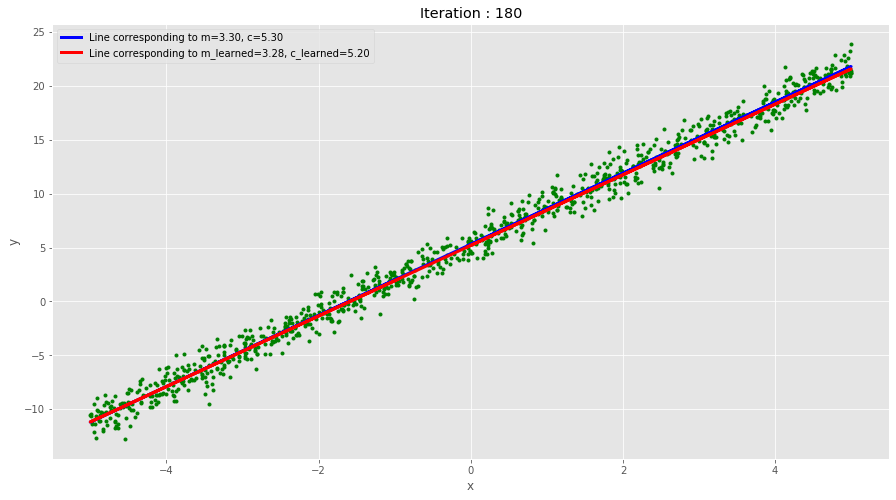

Iteration: 200, Loss: 0.0, updated m: 3.301, updated c: 5.240


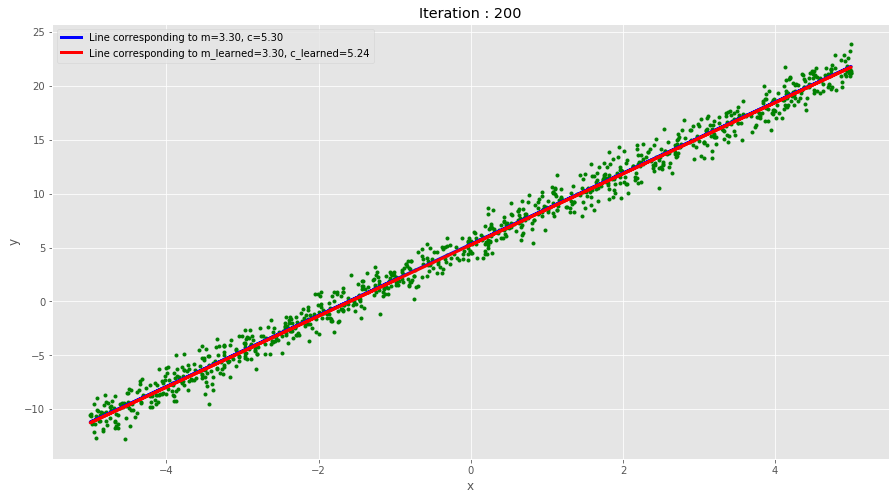

Iteration: 220, Loss: 0.0, updated m: 3.336, updated c: 5.263


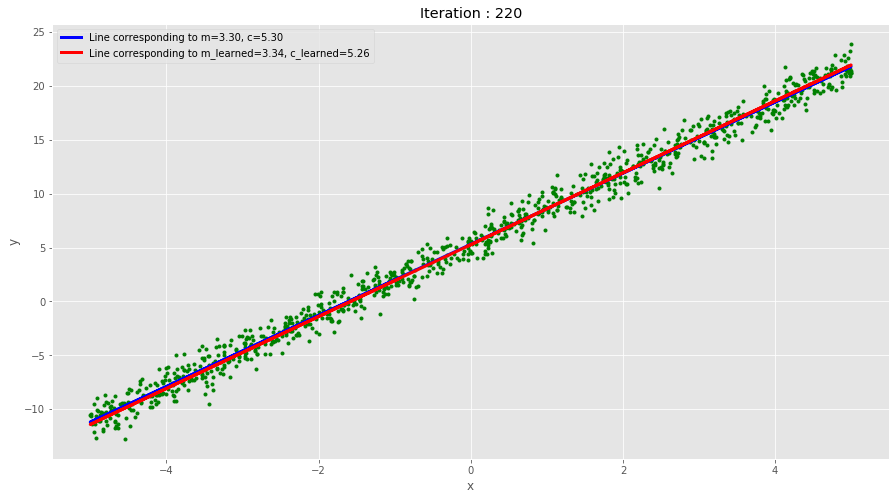

Iteration: 240, Loss: 0.0, updated m: 3.308, updated c: 5.256


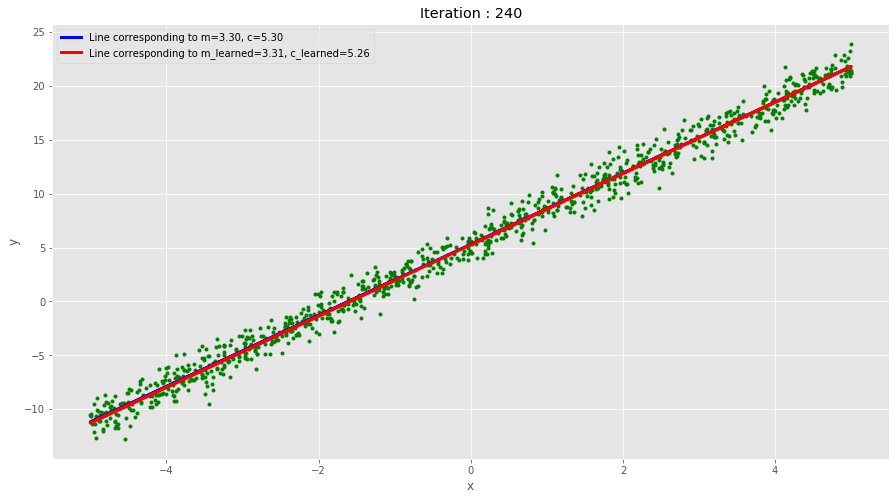

Iteration: 260, Loss: 0.0, updated m: 3.326, updated c: 5.276


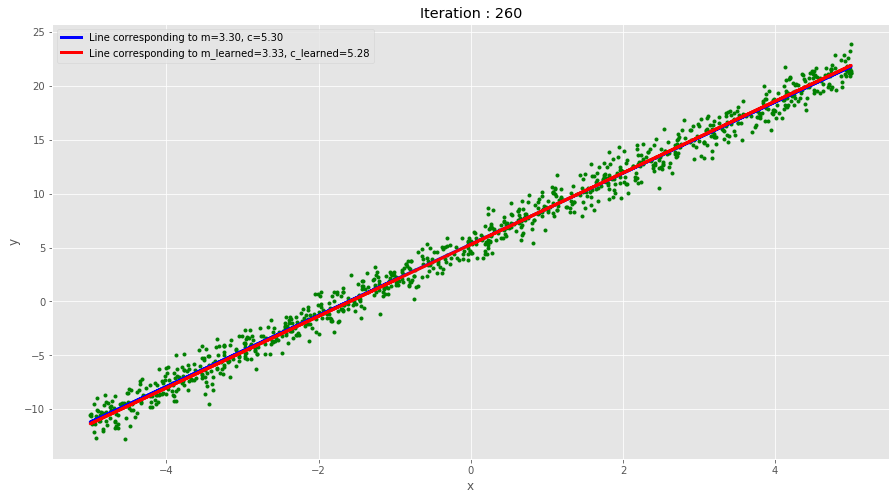

Iteration: 280, Loss: 0.0, updated m: 3.266, updated c: 5.297


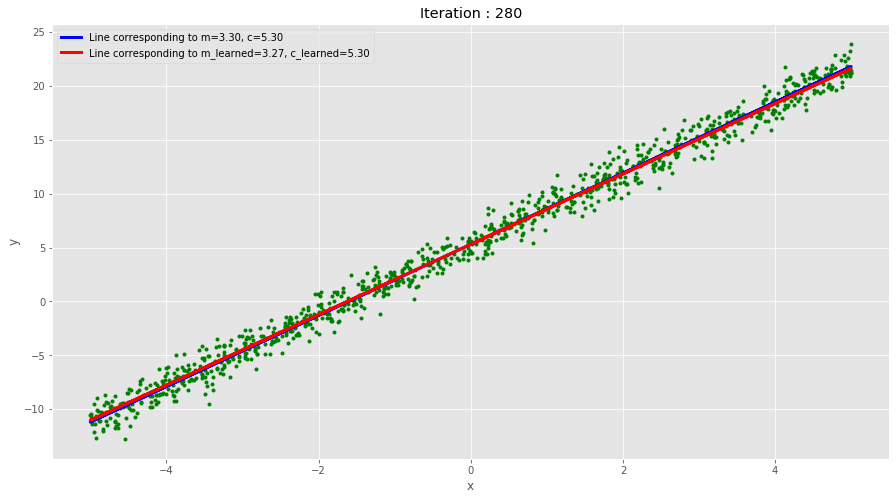

Iteration: 300, Loss: 0.0, updated m: 3.320, updated c: 5.275


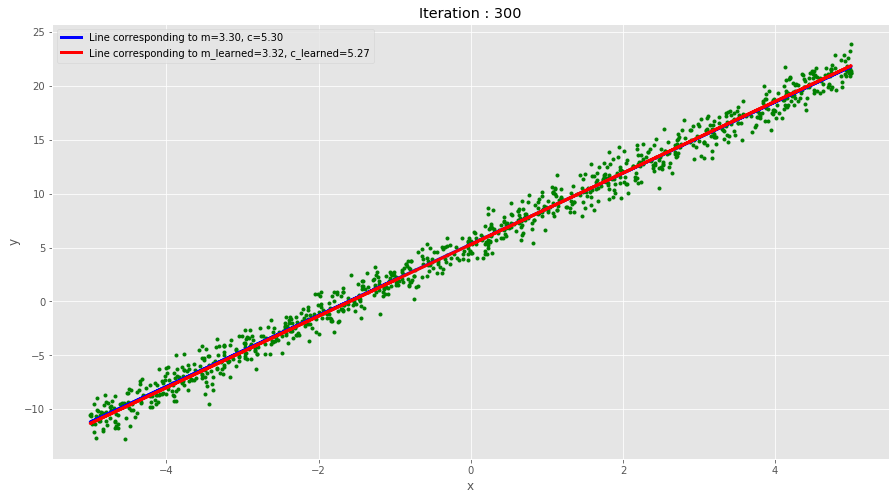

Iteration: 320, Loss: 0.0, updated m: 3.277, updated c: 5.294


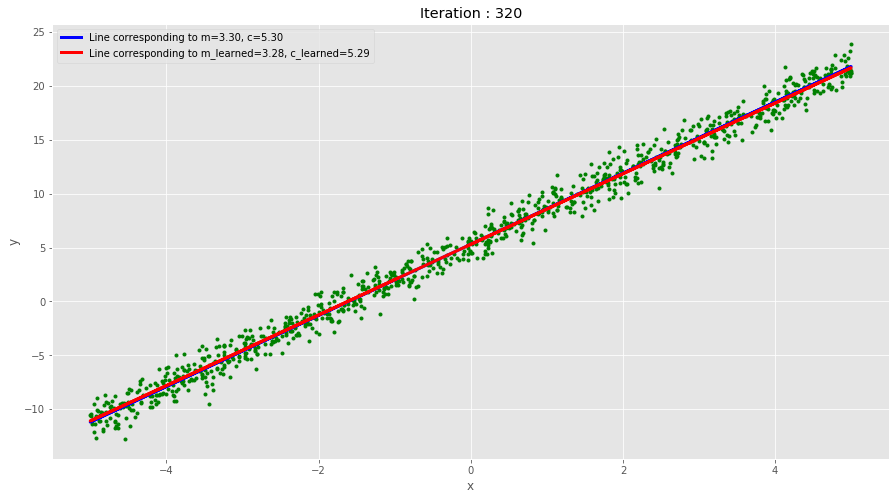

Iteration: 340, Loss: 0.0, updated m: 3.271, updated c: 5.322


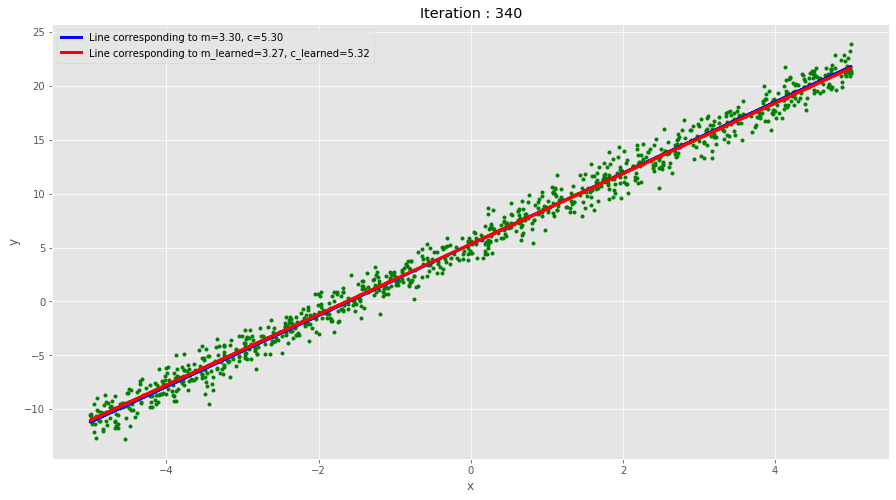

Iteration: 360, Loss: 0.0, updated m: 3.291, updated c: 5.381


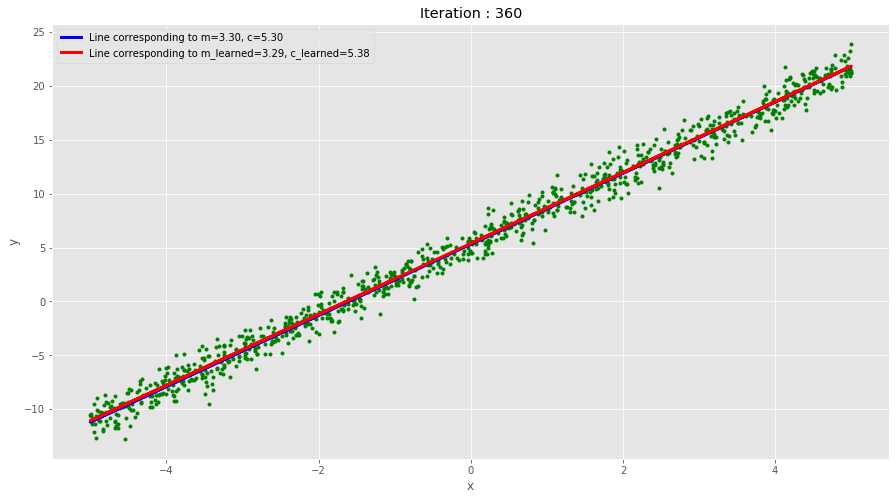

Iteration: 380, Loss: 0.0, updated m: 3.287, updated c: 5.362


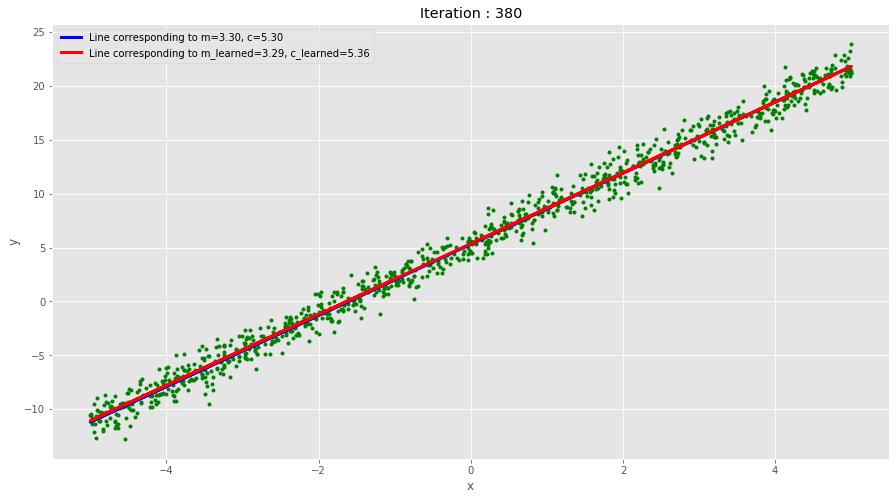

Iteration: 400, Loss: 0.0, updated m: 3.329, updated c: 5.324


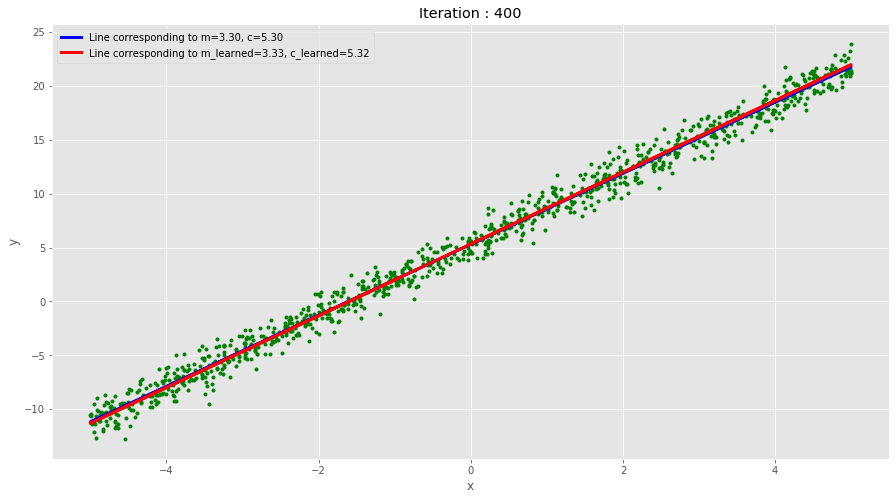

Iteration: 420, Loss: 0.0, updated m: 3.303, updated c: 5.327


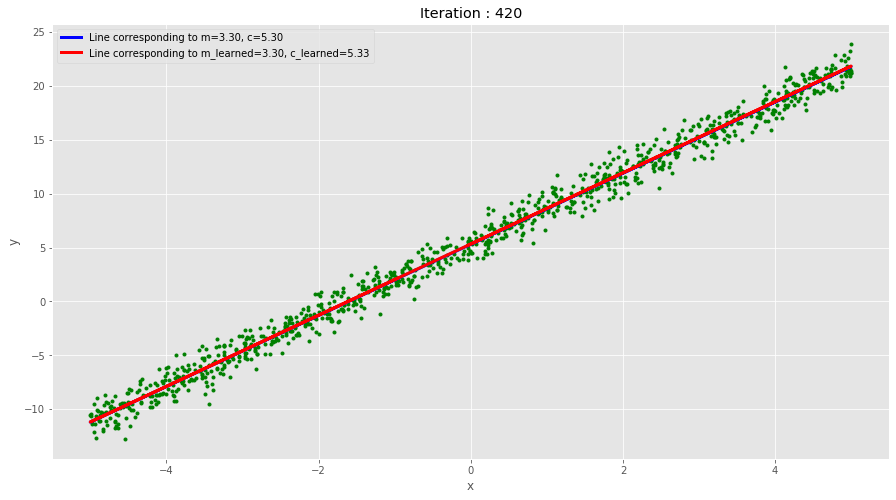

Iteration: 440, Loss: 0.0, updated m: 3.350, updated c: 5.325


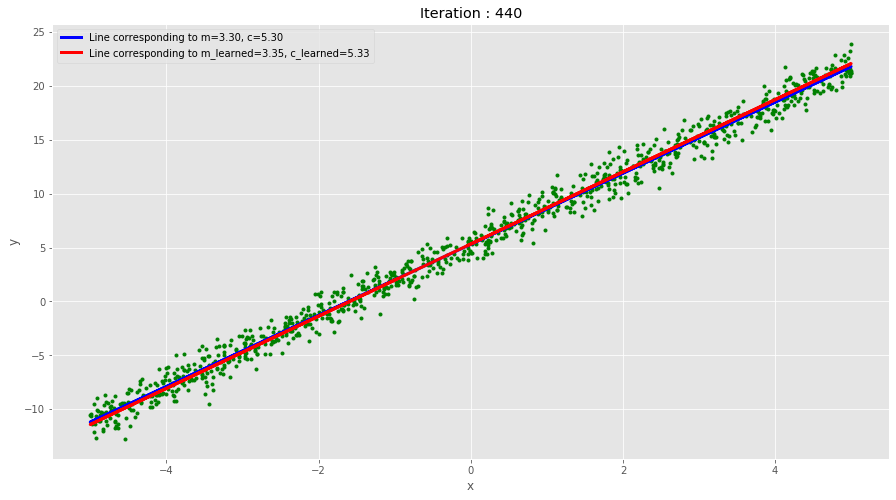

Iteration: 460, Loss: 0.0, updated m: 3.301, updated c: 5.381


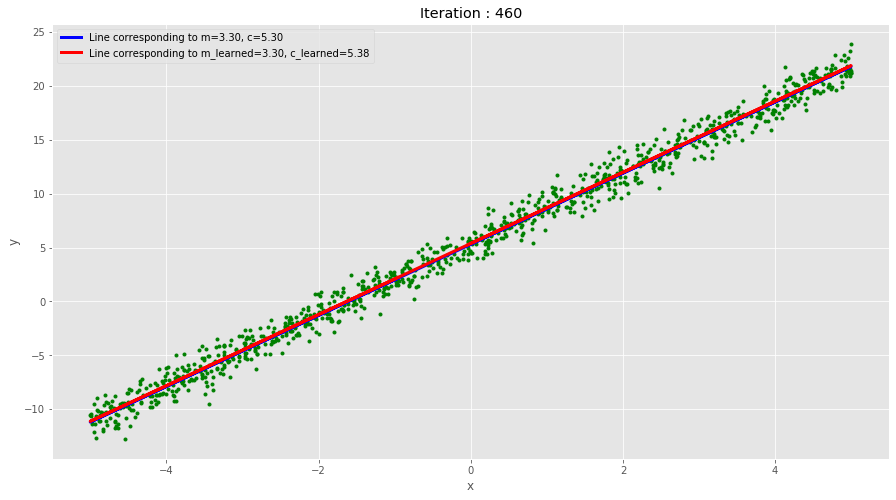

Iteration: 480, Loss: 0.0, updated m: 3.305, updated c: 5.379


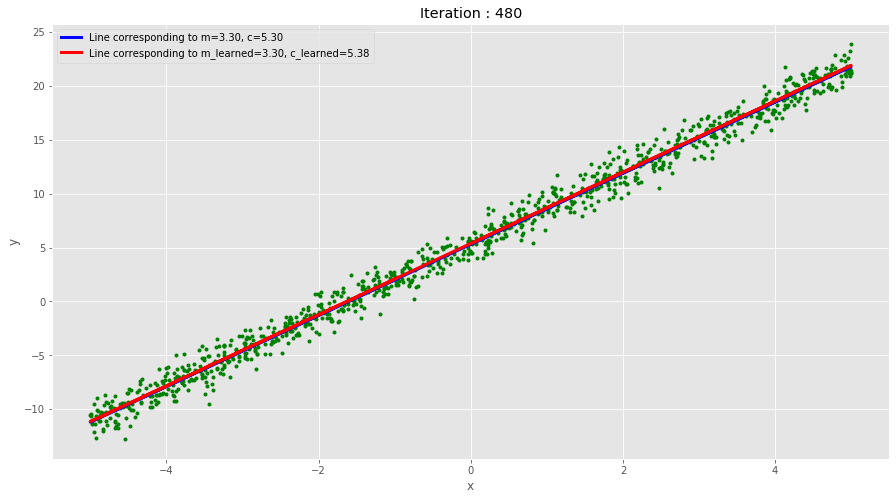

Iteration: 500, Loss: 0.0, updated m: 3.318, updated c: 5.394


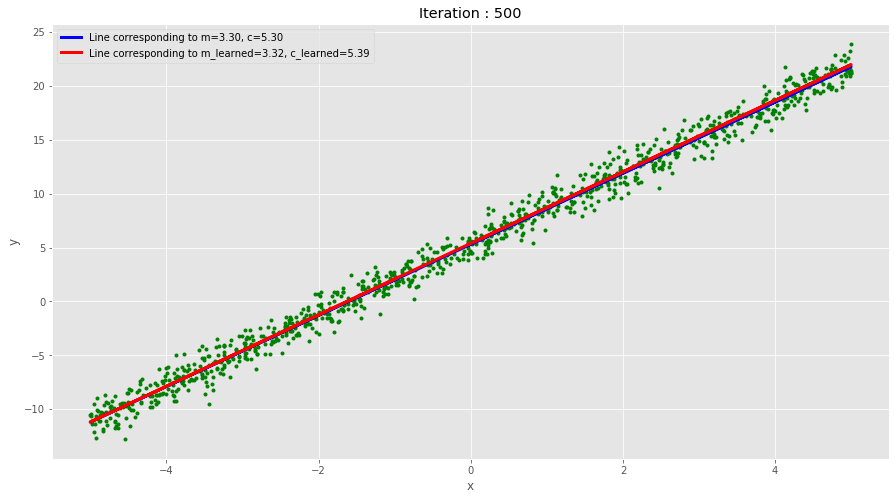

Iteration: 520, Loss: 0.0, updated m: 3.238, updated c: 5.389


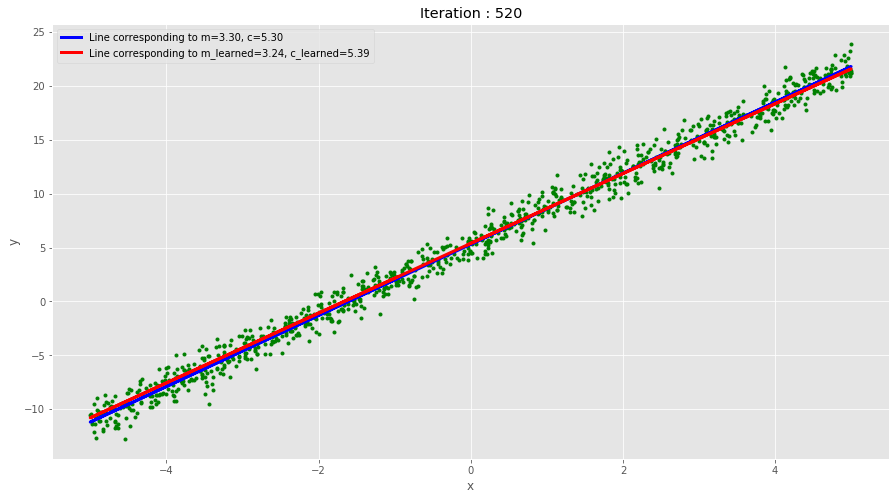

Iteration: 540, Loss: 0.0, updated m: 3.303, updated c: 5.354


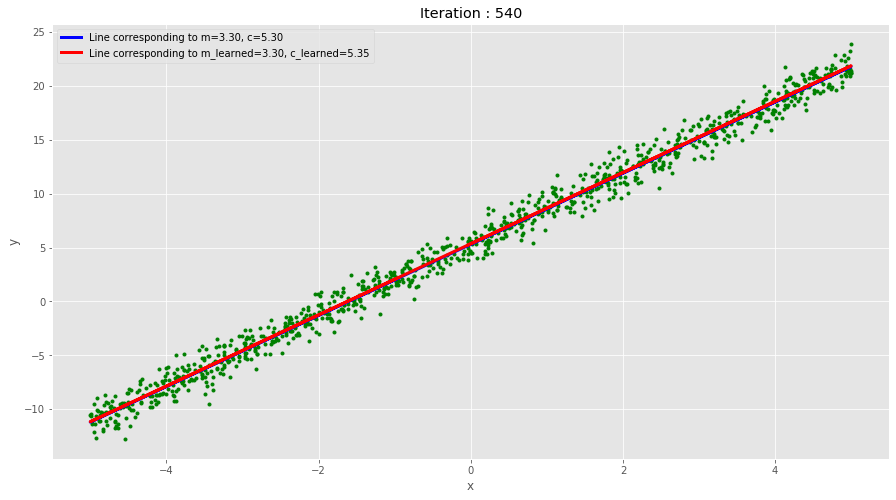

Iteration: 560, Loss: 0.0, updated m: 3.301, updated c: 5.387


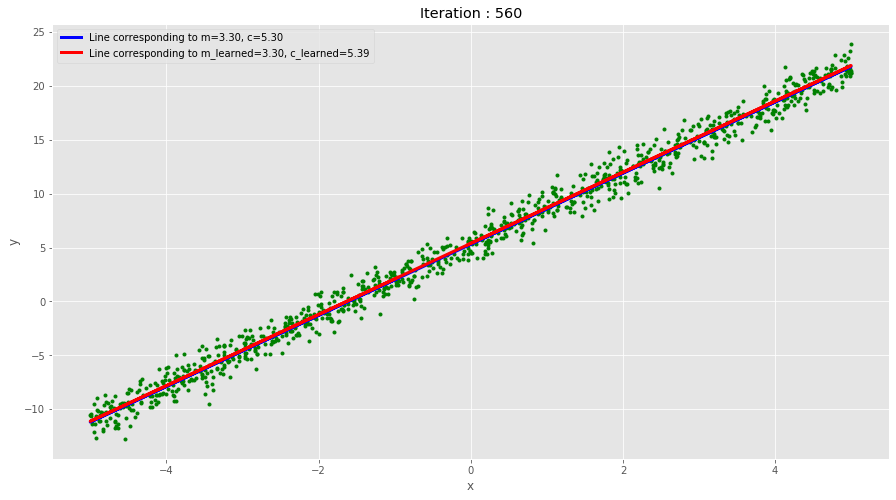

Iteration: 580, Loss: 0.0, updated m: 3.303, updated c: 5.361


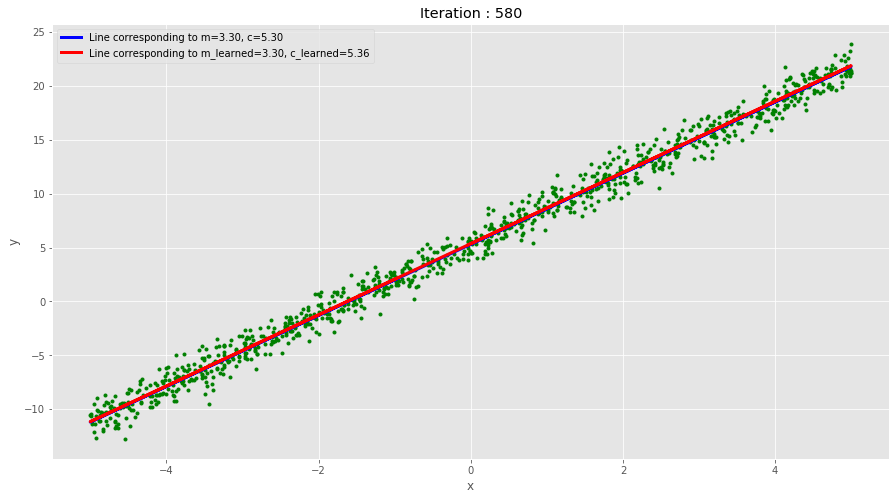

Iteration: 600, Loss: 0.0, updated m: 3.340, updated c: 5.364


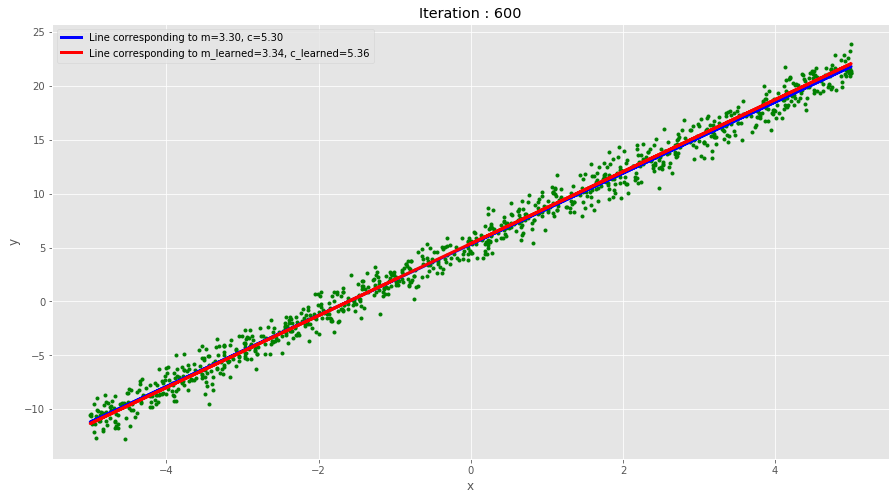

Iteration: 620, Loss: 0.0, updated m: 3.341, updated c: 5.333


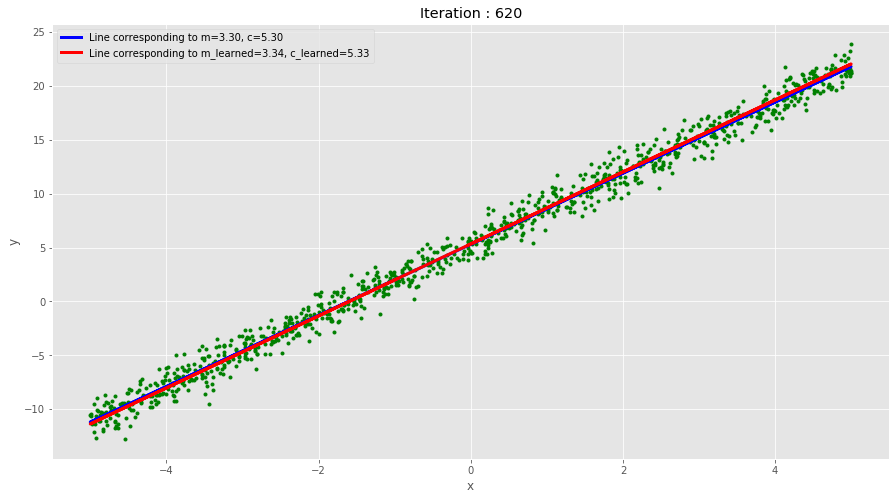

Iteration: 640, Loss: 0.0, updated m: 3.236, updated c: 5.333


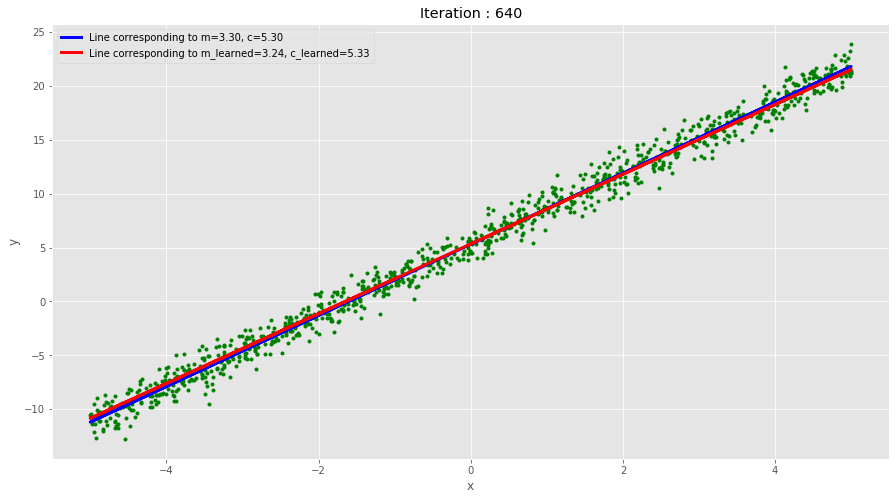

Iteration: 660, Loss: 0.0, updated m: 3.299, updated c: 5.338


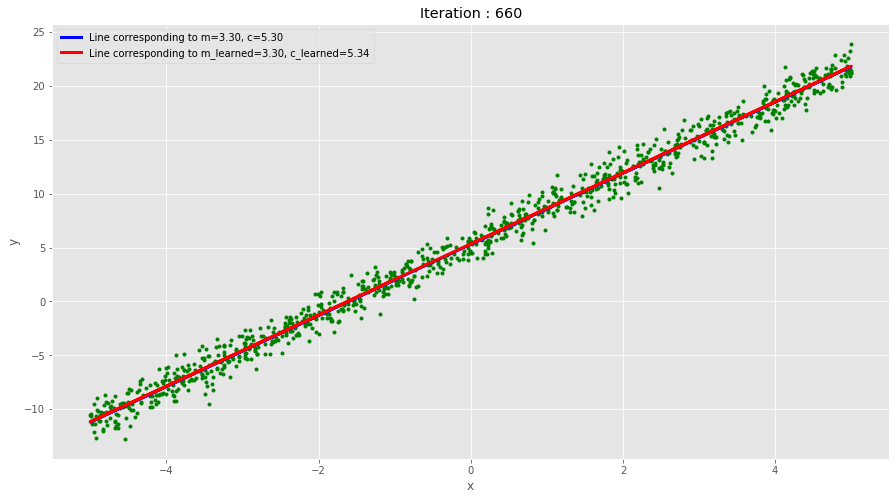

Iteration: 680, Loss: 0.0, updated m: 3.299, updated c: 5.389


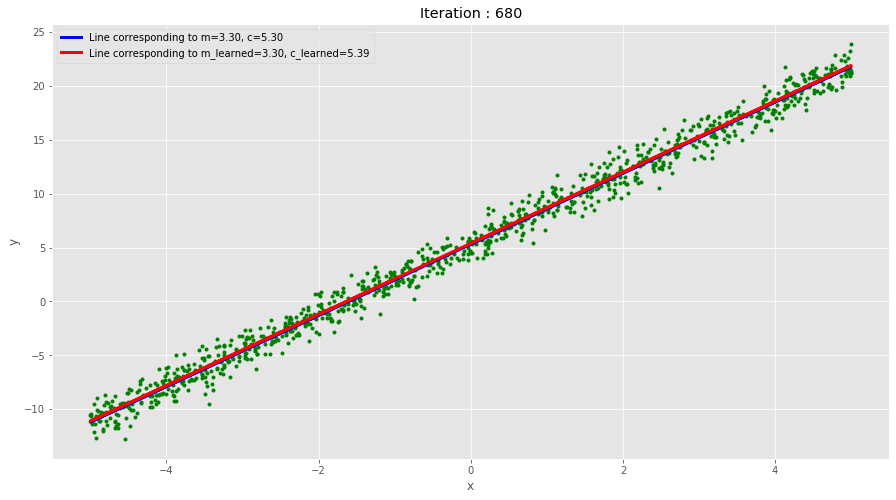

Iteration: 700, Loss: 0.0, updated m: 3.289, updated c: 5.358


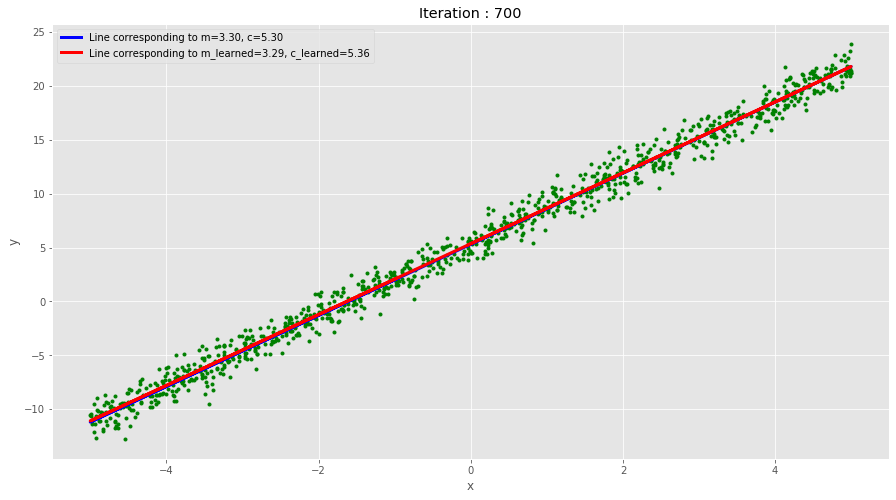

Iteration: 720, Loss: 0.0, updated m: 3.273, updated c: 5.352


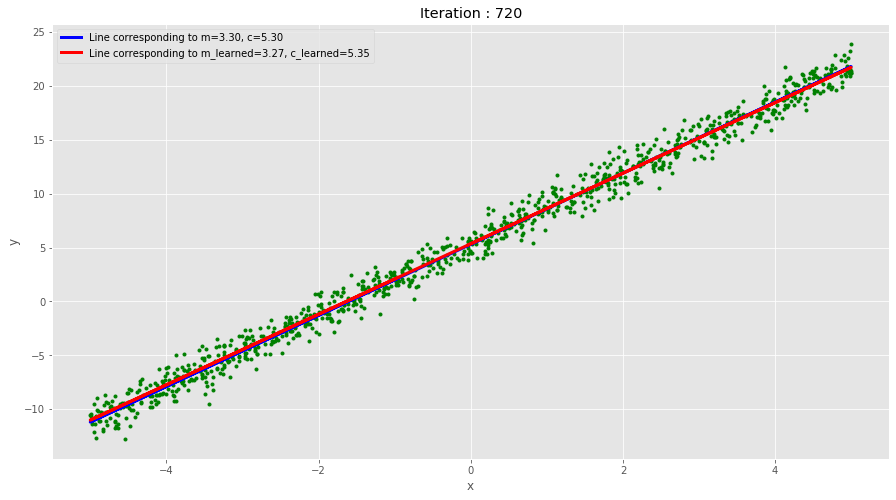

Iteration: 740, Loss: 0.0, updated m: 3.320, updated c: 5.373


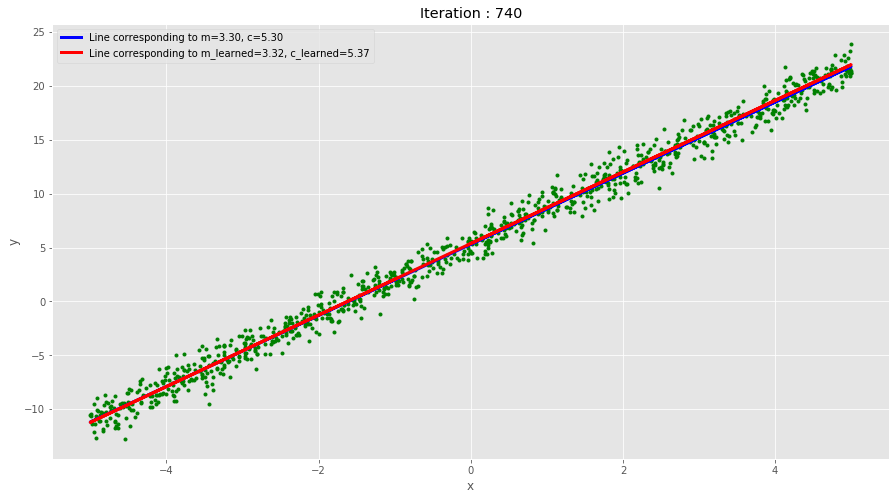

Iteration: 760, Loss: 0.0, updated m: 3.271, updated c: 5.356


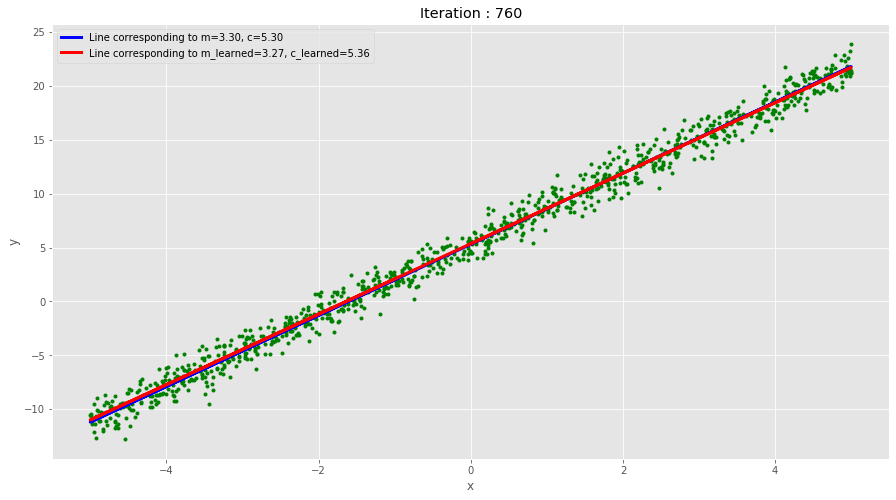

Iteration: 780, Loss: 0.0, updated m: 3.288, updated c: 5.325


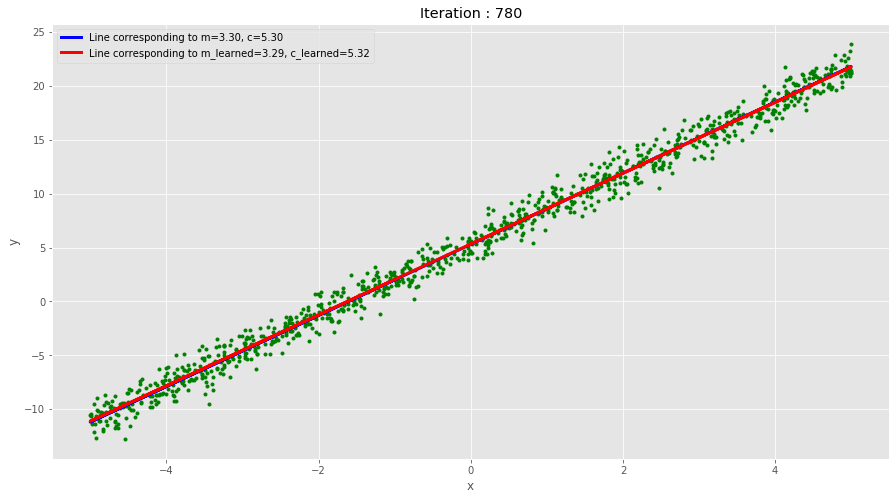

Iteration: 800, Loss: 0.0, updated m: 3.278, updated c: 5.295


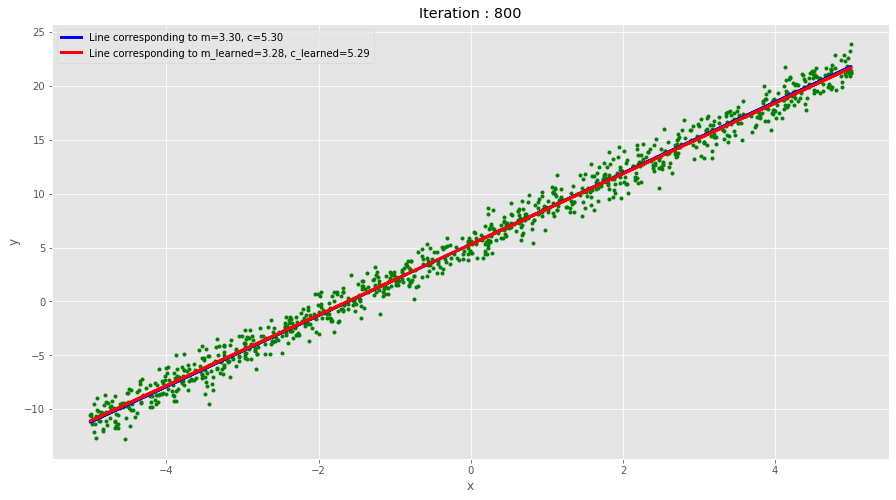

Iteration: 820, Loss: 0.0, updated m: 3.305, updated c: 5.338


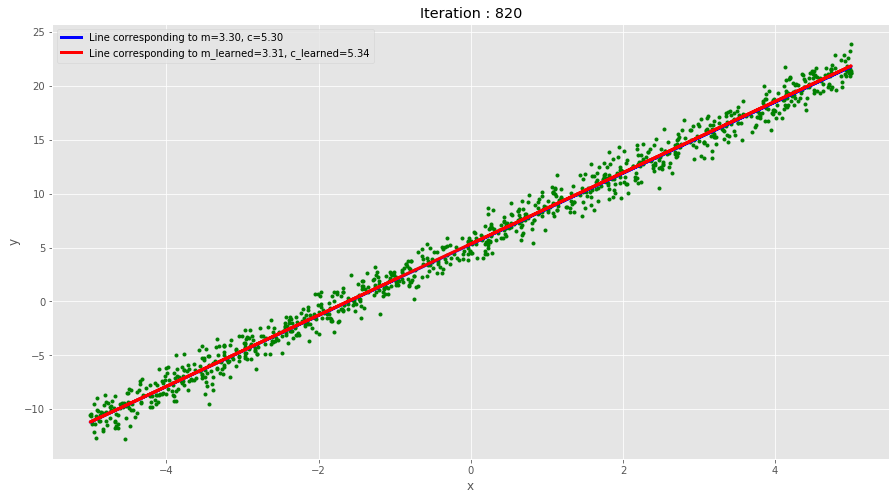

Iteration: 840, Loss: 0.0, updated m: 3.282, updated c: 5.279


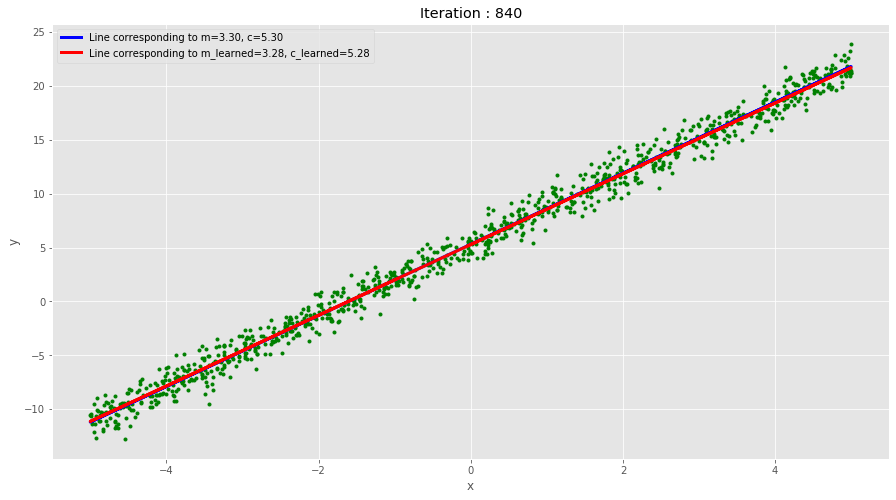

Iteration: 860, Loss: 0.0, updated m: 3.281, updated c: 5.319


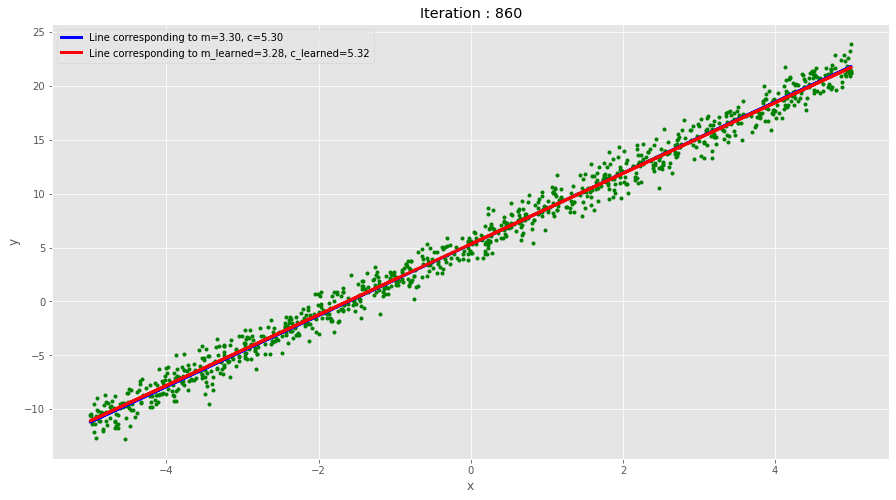

Iteration: 880, Loss: 0.0, updated m: 3.268, updated c: 5.366


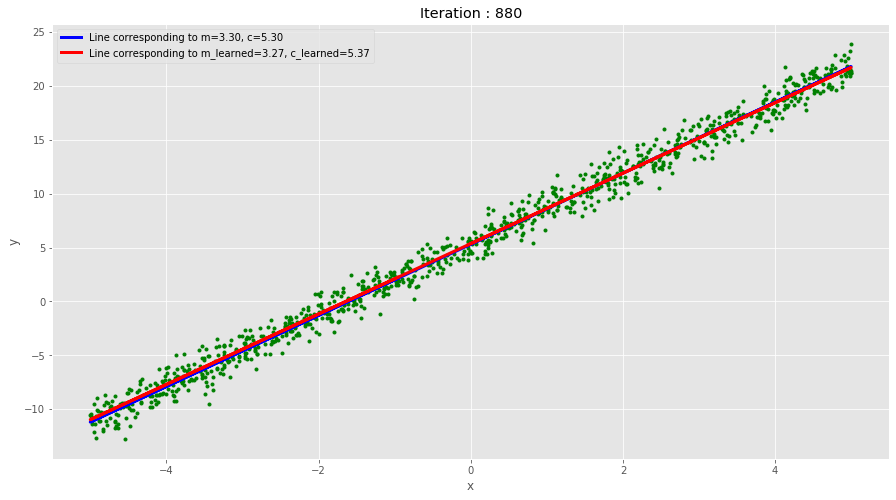

Iteration: 900, Loss: 0.0, updated m: 3.265, updated c: 5.373


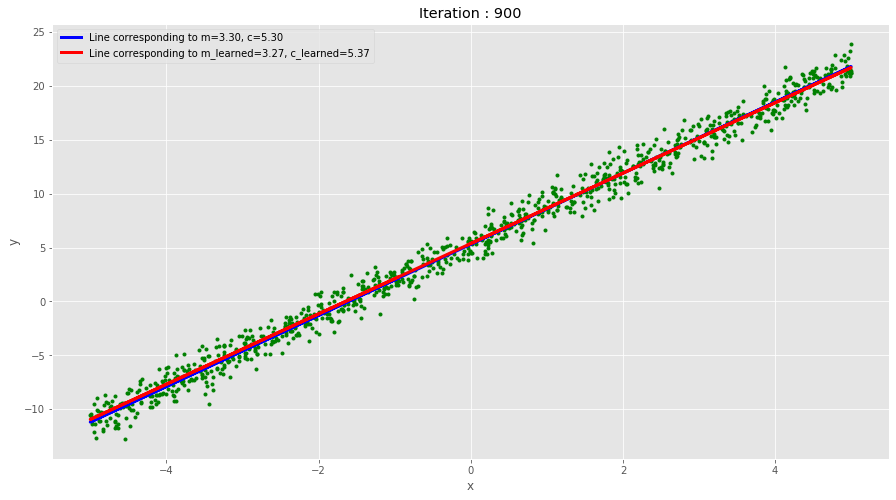

Iteration: 920, Loss: 0.0, updated m: 3.314, updated c: 5.374


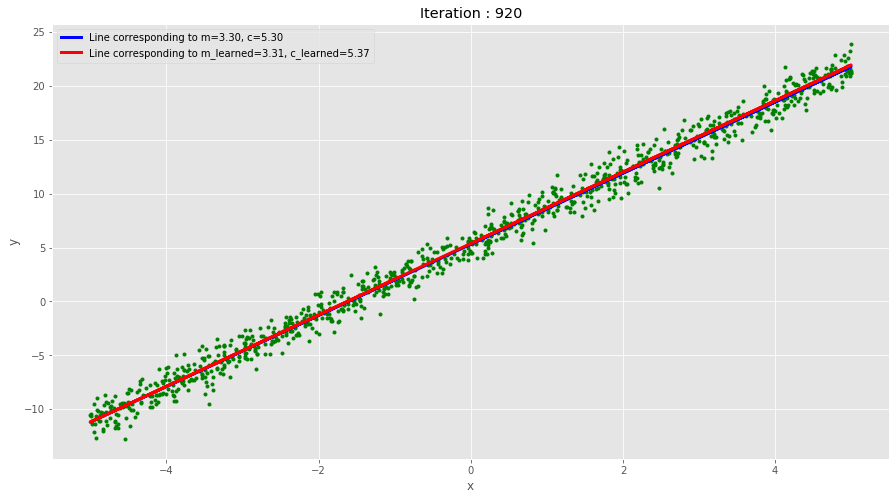

Iteration: 940, Loss: 0.0, updated m: 3.352, updated c: 5.390


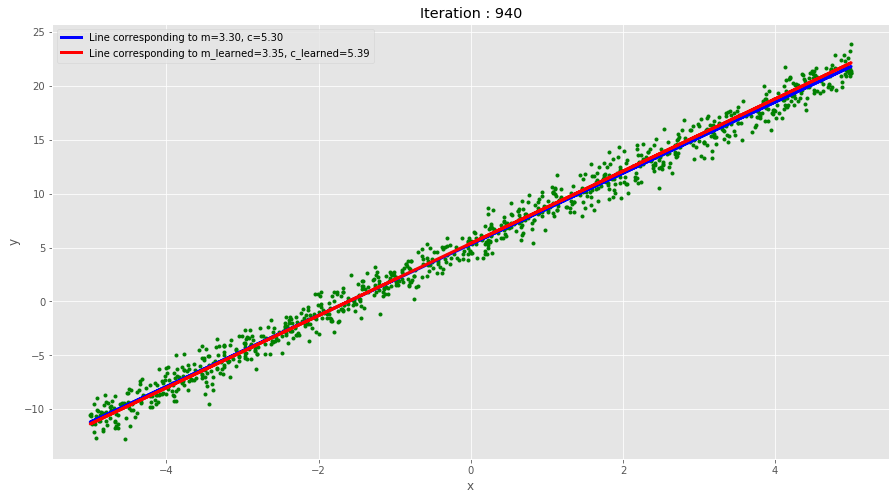

Iteration: 960, Loss: 0.0, updated m: 3.294, updated c: 5.382


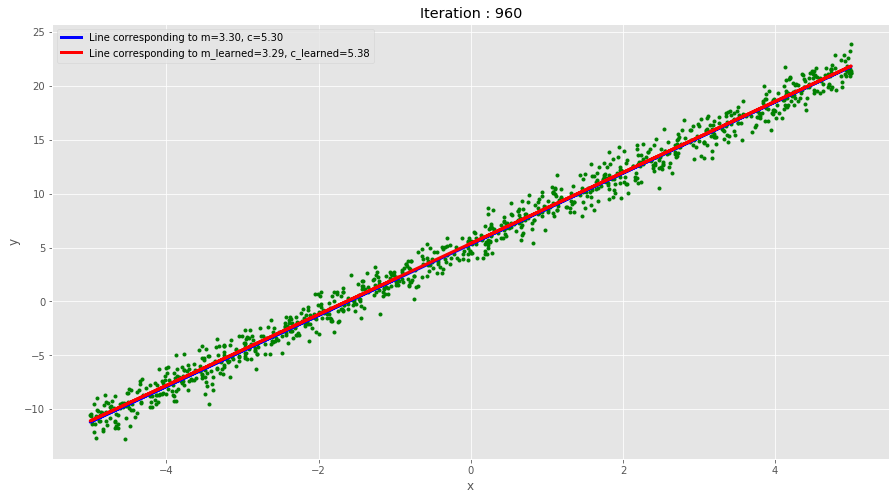

Iteration: 980, Loss: 0.0, updated m: 3.289, updated c: 5.371


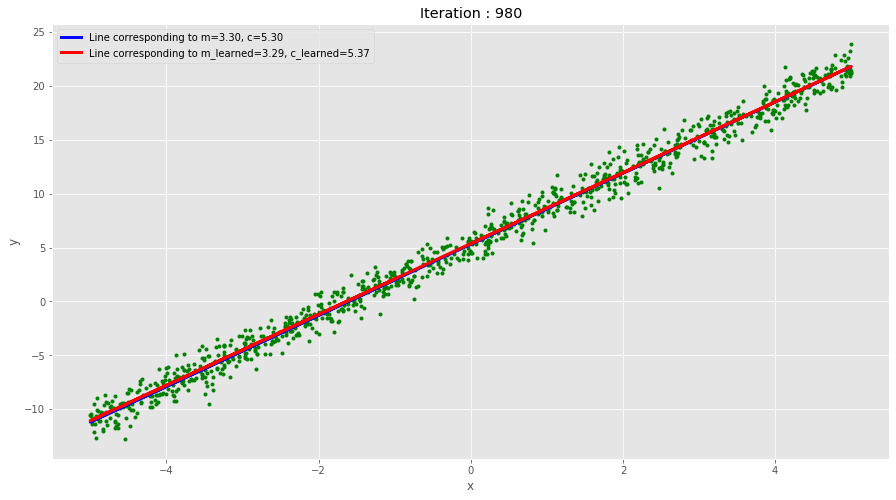

Loss of after last batch: 984.1323852539062
Leaned "m" value: 3.358086585998535
Leaned "c" value: 5.343746185302734


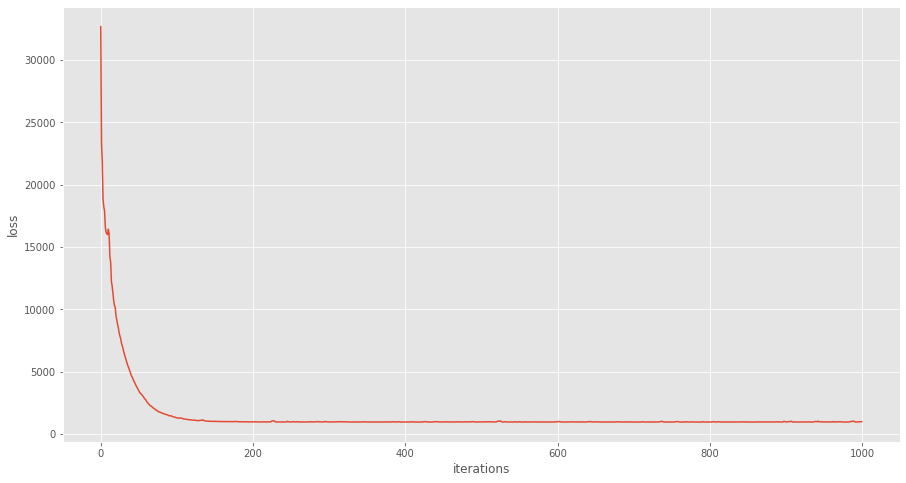

In [12]:
# Stochastic Gradient Descent with Minibatch

# input 
X = x

# output/label
Y = y_label

num_iter = 1000
batch_size = 10

# display updated values after every 10 iterations
display_count = 20
# 

lr = 0.001
m = 2
c = 1
print()
loss = torch.zeros(num_iter)

for i in range(0, num_iter):

    # Randomly select a training data point
    k = torch.randint(0, len(Y)-1, (batch_size,))
  
    # Calculate gradient of m and c using a mini-batch
    g_m, g_c = gradient_wrt_m_and_c(X, Y, m, c, k)
    
    # update m and c parameters
    m, c = update_m_and_c(m, c, g_m, g_c, lr)
    
    # Calculate Error
    e = Y - m * X - c
    # Compute Loss Function
    loss[i] = torch.sum(torch.mul(e,e)) 

    if i % display_count==0:
        print('Iteration: {}, Loss: {}, updated m: {:.3f}, updated c: {:.3f}'.format(i, loss[-1], m, c))
        y_pred = m * X + c
        # Plot the line corresponding to the learned m and c
        plt.plot(x, y_label, '.', color='g')
        plt.plot(x, y, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.
                 format(m_line, c_line), linewidth=3)
        plt.plot(X, y_pred, color='r', label='Line corresponding to m_learned={0:.2f}, c_learned={1:.2f}'.
                 format(m, c), linewidth=3)
        plt.title("Iteration : {}".format(i))
        plt.legend()

        plt.ylabel('y')
        plt.xlabel('x')
        plt.show()
        
print('Loss of after last batch: {}'.format(loss[-1]))
print('Leaned "m" value: {}'.format( m))
print('Leaned "c" value: {}'.format( c))

# Plot loss vs m  
plt.figure
plt.plot(loss.numpy())
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [13]:
# Calculate the predicted y values using the learned m and c
y_pred = m * X + c

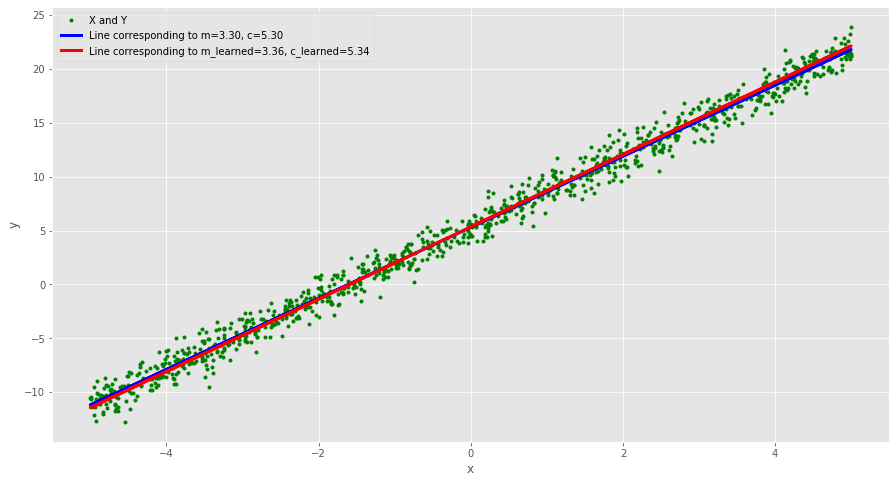

In [14]:
# Plot the line corresponding to the learned m and c
plt.plot(x, y_label, '.', color='g', label='X and Y')
plt.plot(x, y, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.format(m_line, c_line), linewidth=3)
plt.plot(X, y_pred, color='r', label='Line corresponding to m_learned={0:.2f}, c_learned={1:.2f}'.format(m, c), linewidth=3)
plt.legend()

plt.ylabel('y')
plt.xlabel('x')
plt.show()